In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [36]:
# spss 읽을수 있도록 라이브러리 설치
# 데이터 다운 받고, 읽고,
# 컬럼명 바꾸기
import pandas as pd
import numpy as np
import seaborn as sns
# SPSS 통계 패키지 전용 파일 데이터 불러오기
# SPSS(Statistical Package for the Social Sciences)는 사회 과학용 통계 패키지로 IBM 소유 패키지
raw_welfare = pd.read_spss('../Data/Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()
# 코드북을 참조하여 분석에 사용할 7개 변수명을 알기쉬운 단어로 변경  
welfare = welfare.rename(
   columns = {'h14_g3'     : 'sex',              # 성별
              'h14_g4'     : 'birth',            # 태어난 연도
              'h14_g10'    : 'marriage_type',    # 혼인 상태
              'h14_g11'    : 'religion',         # 종교
              'p1402_8aq1' : 'income',           # 일한달의 월 평균 임금
              'h14_eco9'   : 'code_job',         # 직종
              'h14_reg7'   : 'code_region'       # 7개 권역별 지역 구분
             })
# 바뀐 변수명으로 데이터 확인
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job','code_region' ]].head(1)

sex   birth  marriage_type  religion  income  code_job  code_region
0  2.0  1945.0            2.0       1.0     NaN       NaN          1.0

In [38]:
#1. 성별 1-> male, 2-> female
welfare['sex'] = np.where(welfare['sex'] == 1 , 'male', 'female')
#2. 나이 ->  2019년 조사  => 
welfare['age'] = 2019- welfare['birth'] + 1
#3. welfare['ageg']  <30  => young,   30<  < 60  middle ,   60<  old
welfare['ageg'] = np.where(welfare['age'] < 30, 'young',
                          np.where(welfare['age'] < 60, 'middle', 'old'))

In [60]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job','code_region', 'age', 'ageg' ]].head(10)

sex   birth marriage_type religion  income  code_job  code_region   age  \
0  female  1945.0            기타     종교있음     NaN       NaN          1.0  75.0   
1    male  1948.0            기타     종교없음     NaN       NaN          1.0  72.0   
2    male  1942.0            이혼     종교있음   107.0     762.0          1.0  78.0   
3    male  1962.0            결혼     종교있음   192.0     855.0          1.0  58.0   
4  female  1963.0            결혼     종교있음     NaN       NaN          1.0  57.0   
5  female  2003.0            기타     종교있음     NaN       NaN          1.0  17.0   
6    male  1927.0            결혼     종교있음     NaN       NaN          1.0  93.0   
7  female  1934.0            결혼     종교있음    27.0     941.0          1.0  86.0   
8  female  1940.0            기타     종교있음    27.0     999.0          2.0  80.0   
9  female  1970.0            이혼     종교있음     NaN       NaN          1.0  50.0   

     ageg  
0     old  
1     old  
2     old  
3  middle  
4  middle  
5   young  
6     old  
7     old  
8     old  
9  middle

In [42]:
# 기존에 2개의 컬럼을 가지고 실습을 진행, 이번 주에는 3개의 컬럼을 가지고 실습을 진행
# 종교 컬럼 분석
welfare['religion'].isna().sum() # 비어있는 값이 몇 개?
welfare['religion'].unique() # 어떤 값이 들어있는지 확인
welfare['religion'].value_counts() # 값이 몇 개씩 들어있는지?
welfare['religion'] = np.where(welfare['religion'] == 1, '종교있음', '종교없음')

In [46]:
welfare['religion'].head()

0    종교있음
1    종교없음
2    종교있음
3    종교있음
4    종교있음
Name: religion, dtype: object

In [56]:
# 결혼유무 파악
welfare['marriage_type'].isna().sum()
welfare['marriage_type'].unique()
welfare['marriage_type'].value_counts()
# 1 = 결혼, 3 = 이혼, 나머지 = 기타
welfare['marriage_type'] = np.where(welfare['marriage_type'] == 1, '결혼', 
                            np.where(welfare['marriage_type'] == 3, '이혼', '기타'))

In [62]:
welfare[['sex', 'birth', 'marriage_type', 'religion', 'income', 'code_job','code_region', 'age', 'ageg' ]].head(10)

sex   birth marriage_type religion  income  code_job  code_region   age  \
0  female  1945.0            기타     종교있음     NaN       NaN          1.0  75.0   
1    male  1948.0            기타     종교없음     NaN       NaN          1.0  72.0   
2    male  1942.0            이혼     종교있음   107.0     762.0          1.0  78.0   
3    male  1962.0            결혼     종교있음   192.0     855.0          1.0  58.0   
4  female  1963.0            결혼     종교있음     NaN       NaN          1.0  57.0   
5  female  2003.0            기타     종교있음     NaN       NaN          1.0  17.0   
6    male  1927.0            결혼     종교있음     NaN       NaN          1.0  93.0   
7  female  1934.0            결혼     종교있음    27.0     941.0          1.0  86.0   
8  female  1940.0            기타     종교있음    27.0     999.0          2.0  80.0   
9  female  1970.0            이혼     종교있음     NaN       NaN          1.0  50.0   

     ageg  
0     old  
1     old  
2     old  
3  middle  
4  middle  
5   young  
6     old  
7     old  
8     old  
9  middle

In [64]:
# 결혼, 종교에 따른 사람 수 카운트
welfare.groupby(['religion', 'marriage_type']).agg(사람수 = ('religion', 'count'))

사람수
religion marriage_type      
종교없음     결혼             3660
         기타             3771
         이혼              384
종교있음     결혼             3530
         기타             2768
         이혼              305

In [74]:
# 변수에 담기
var = "기타"
welfare.query('marriage_type != @var')\
        .groupby(['religion', 'marriage_type'], as_index=False).agg(사람수 = ('religion', 'count'))

religion marriage_type   사람수
0     종교없음            결혼  3660
1     종교없음            이혼   384
2     종교있음            결혼  3530
3     종교있음            이혼   305

In [72]:
# groupby에 하나만 넣겠다.
welfare.query('marriage_type != @var')\
        .groupby(['religion'], as_index=False)['marriage_type'].value_counts()
# .agg(사람수 = ('religion', 'count'))

religion marriage_type  count
0     종교없음            결혼   3660
1     종교없음            이혼    384
2     종교있음            결혼   3530
3     종교있음            이혼    305

In [76]:
welfare.query('marriage_type != @var')\
        .groupby(['religion'], as_index=False)['ageg'].value_counts()

religion    ageg  count
0     종교없음  middle   2241
1     종교없음     old   1757
2     종교없음   young     46
3     종교있음     old   2160
4     종교있음  middle   1661
5     종교있음   young     14

<Axes: xlabel='religion', ylabel='proportion'>

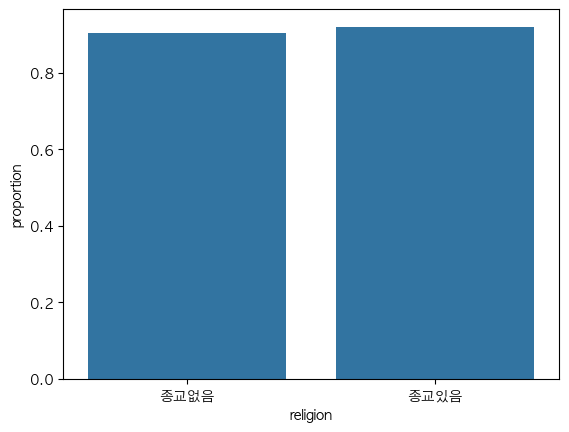

In [111]:
result = welfare.query('marriage_type != @var')\
            .groupby(['religion'], as_index=False)['marriage_type'].value_counts(normalize=True)
result.query('marriage_type == "결혼"')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})
sns.barplot(data = result.query('marriage_type == "결혼"'), x = 'religion', y = 'proportion')

In [103]:
# 이혼률 그래프 (종교 있는 사람, 종교 없는 사람)
result

religion marriage_type  proportion
0     종교없음            결혼    0.905045
1     종교없음            이혼    0.094955
2     종교있음            결혼    0.920469
3     종교있음            이혼    0.079531

In [105]:
pivot_result = result.pivot(index= "religion", columns= "marriage_type", values="proportion")
pivot_result

marriage_type        결혼        이혼
religion                         
종교없음           0.905045  0.094955
종교있음           0.920469  0.079531

<Axes: ylabel='religion'>

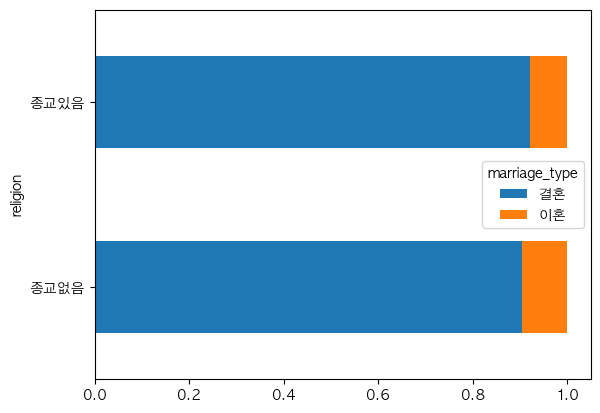

In [107]:
pivot_result.plot.barh(stacked = True)

In [117]:
# 종교 있음 없음, 지역으로 구분
# 'code_region' -> 지역
r10 = welfare.groupby(['religion', 'code_region'], as_index=False).agg(명수 = ('religion', 'count'))
r11 = r10.pivot(index='religion', columns='code_region', values='명수')
r11

code_region   1.0   2.0   3.0  4.0  5.0  6.0   7.0
religion                                          
종교없음         1000  1830  1130  895  761  621  1578
종교있음         1002  1416  1318  833  630  516   888

<Axes: ylabel='religion'>

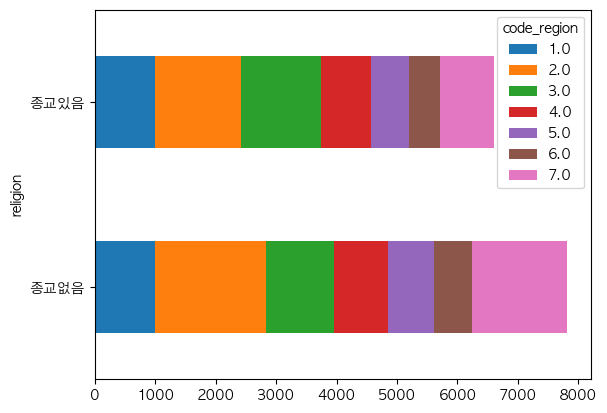

In [119]:
r11.plot.barh(stacked = True)

In [127]:
# groupby 컬럼 1개 -> 컬럼 추가 -> value counts -> normalize 변경
r12 = welfare.groupby(['religion'], as_index=False)['code_region'].value_counts(normalize = True)
r12
r13 = r12.pivot(index= 'religion', columns='code_region', values='proportion')
r13

code_region       1.0       2.0       3.0       4.0       5.0       6.0  \
religion                                                                  
종교없음         0.127959  0.234165  0.144594  0.114523  0.097377  0.079463   
종교있음         0.151749  0.214448  0.199606  0.126155  0.095411  0.078146   

code_region       7.0  
religion               
종교없음         0.201919  
종교있음         0.134484

<Axes: ylabel='religion'>

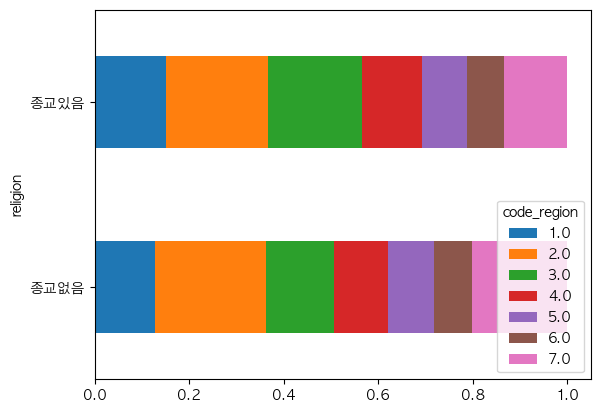

In [129]:
r13.plot.barh(stacked = True)

In [145]:
# 종교, 결혼 여부, 연령대
# groupby 3개
r3 = welfare.groupby(['marriage_type', 'religion', 'ageg']).agg(명수 = ('religion', 'count'))
r3
# groupby 2개, 밖에 하나
# welfare.groupby(['marriage_type', 'religion'], as_index=False)['ageg'].value_counts()
# groupby 1개, 밖에 두개
# streamlit 변경하는 작업하라
# 사용자들한테 입력을 받을 것.

명수
marriage_type religion ageg        
결혼            종교없음     middle  2028
                       old     1589
                       young     43
              종교있음     middle  1524
                       old     1992
                       young     14
기타            종교없음     middle   653
                       old      876
                       young   2242
              종교있음     middle   408
                       old     1162
                       young   1198
이혼            종교없음     middle   213
                       old      168
                       young      3
              종교있음     middle   137
                       old      168